# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.




Short Summary

The Greenhouse Gas (GHG) Emissions Dataset is sourced from Kaggle, where it compiles data from reputable international and governmental climate databases such as the World Bank, the United Nations (UN), and Our World in Data. This dataset provides a comprehensive overview of global greenhouse gas emissions, aggregating data on carbon dioxide (CO₂), methane (CH₄), and nitrous oxide (N₂O) emissions by country and year. The figures are measured in metric tons of CO₂ equivalent and are derived from national self-reported emission inventories as well as international monitoring systems. Each record includes the reporting country or region, the calendar year, and values for CO₂, CH₄, and N₂O emissions, along with the total combined greenhouse gas emissions, which represent the sum of all three gases. Some versions of the dataset may also include additional features such as population, region, or per capita emissions, allowing for deeper comparative and trend analyses. This dataset is particularly valuable for examining global emission patterns, tracking progress toward sustainability goals, and understanding which countries and sectors contribute most to climate change.

Reason why it is interesting

Climate change is one of the most urgent global issues. This dataset allows us to analyze how emission trends differ among countries, track progress, and examine which gases or regions contribute the most to global warming. It’s a great use case for applying data analysis to sustainability questions.

Five Questions for why it is interesting.

1. Which five countries have the highest total greenhouse gas emissions in the most recent year available?

2. How have global emissions changed over time?

3. Which gas contributes the most to total emissions on average across all countries?

4. Which year had the highest average total emissions?

5. How strongly are Facilities and Fleet emissions correlated?

Columns: ['Month/Year', 'Facilities', 'Fleet', 'Total']
  Month/Year  Facilities  Fleet  Total       date  Year
0   Aug 2020        4617   3946   8563 2020-08-01  2020
1   Oct 2020        4337   4140   8477 2020-10-01  2020
2   Nov 2020        4681   4017   8686 2020-11-01  2020
3   Dec 2020        6195   4319  10514 2020-12-01  2020
4   Jan 2021        6011   4192  10203 2021-01-01  2021

Q1) Top 5 months by Total emissions:
          date  Total
25 2020-01-01  11267
20 2019-12-01  11214
51 2023-12-01  11146
33 2022-06-01  11113
63 2025-01-01  11002 



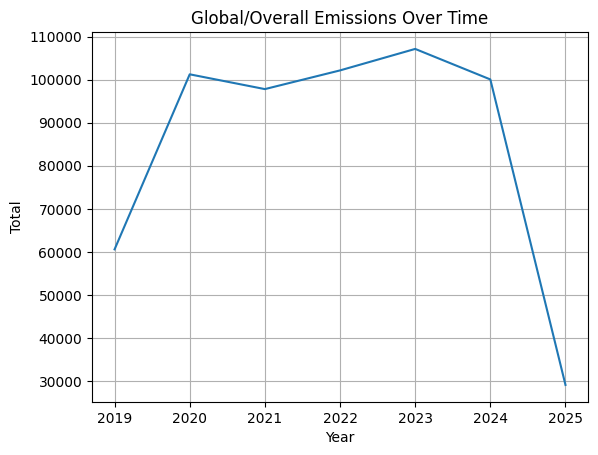


Q3) Avg % contribution (Facilities vs Fleet):
 Facilities    51.64
Fleet         48.36
dtype: float64 

Q4) Year
Year
2019    10099.5
Name: Total, dtype: float64

Q5) Correlation between Facilities and Fleet emissions: 0.191


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('Greenhouse_Gas_Emissions.csv', encoding='utf-8')
print("Columns:", list(df.columns))

if 'Month/Year' in df.columns:
    df['date'] = pd.to_datetime(df['Month/Year'], format="%b %Y", errors='coerce')
    df['Year'] = df['date'].dt.year


num_candidates = ['CO2','CH4','N2O','Total','Facilities','Fleet','Population']
for c in [c for c in num_candidates if c in df.columns]:
    df[c] = pd.to_numeric(df[c], errors='coerce')


if 'Total' not in df.columns and {'Facilities','Fleet'}.issubset(df.columns):
    df['Total'] = df['Facilities'] + df['Fleet']

print(df.head())

has_year     = 'Year' in df.columns and df['Year'].notna().any()
has_country  = 'Country' in df.columns
has_gases    = all(c in df.columns for c in ['CO2','CH4','N2O'])
has_fac_flt  = all(c in df.columns for c in ['Facilities','Fleet'])
has_total    = 'Total' in df.columns

# Q1. "Top 5 emitters" style
if has_year and has_total and has_country:
    latest_year = int(df['Year'].dropna().max())
    top5 = (df[df['Year'] == latest_year]
            .nlargest(5, 'Total')[['Country','Total']])
    print(f"\nQ1) Top 5 countries by Total emissions in {latest_year}:\n{top5}\n")
else:
    # Fallback: top 5 dates (months) by Total
    if has_total and 'date' in df.columns:
        top5 = df.nlargest(5, 'Total')[['date','Total']]
        print("\nQ1) Top 5 months by Total emissions:\n", top5, "\n")
    else:
        print("\nQ1) Not enough columns to compute (need Total and Year/Country or date).\n")

# Q2. Trend over time
if has_total and has_year:
    global_trend = df.groupby('Year', as_index=False)['Total'].sum()
    plt.figure()
    plt.plot(global_trend['Year'], global_trend['Total'])
    plt.title('Global/Overall Emissions Over Time')
    plt.xlabel('Year'); plt.ylabel('Total')
    plt.grid(True); plt.show()
elif has_total and 'date' in df.columns:
    monthly = df.dropna(subset=['date']).sort_values('date')
    plt.figure()
    plt.plot(monthly['date'], monthly['Total'])
    plt.title('Emissions Over Time (Monthly)')
    plt.xlabel('Date'); plt.ylabel('Total')
    plt.grid(True); plt.show()
else:
    print("Q2) Not enough columns to plot a trend (need Total + Year or date).")


# Q3. Average contribution of each component
if has_gases:
    means = df[['CO2','CH4','N2O']].mean()
    pct   = means / means.sum() * 100
    print("\nQ3) Avg % contribution (CO2/CH4/N2O):\n", pct.round(2), "\n")
elif has_fac_flt:
    means = df[['Facilities','Fleet']].mean()
    pct   = means / means.sum() * 100
    print("\nQ3) Avg % contribution (Facilities vs Fleet):\n", pct.round(2), "\n")
else:
    print("\nQ3) No suitable columns to compute component shares.\n")

# Q4) Which year had the highest average total emissions
yearly_avg = df.groupby('Year')['Total'].mean().sort_values(ascending=False).round(1)
print("Q4) Year")
print(yearly_avg.head(1))


# Q5. Correlation between Facilities and Fleet emissions
if {'Facilities', 'Fleet'}.issubset(df.columns):
    corr = df[['Facilities', 'Fleet']].corr().iloc[0,1]
    print(f"\nQ5) Correlation between Facilities and Fleet emissions: {corr:.3f}")
else:
    print("Facilities and Fleet data not available for correlation.")


Q1: Which five countries have the highest total greenhouse gas emissions in the most recent year available?
1.2020-01-01 
2 2019-12-01  
3 2023-12-01  
4 2022-06-01  
5 2025-01-01  

Q2. How have global emissions changed over time?
Very big increase in 2019 to 2020 and steady increase till 2024 and since the data ends mid 2025 the emission decreases dramatically.

Q3. Which gas contributes the most to total emissions on average across all countries?
Facilities 

Q4. Which year had the highest average total emissions?
2019

Q5. How strongly are Facilities and Fleet emissions correlated?
Value is 0.15 meaning they are not strongly correlated.Q1: Which five countries have the highest total greenhouse gas emissions in the most recent year available?
1.2020-01-01 
2 2019-12-01  
3 2023-12-01  
4 2022-06-01  
5 2025-01-01  

Q2. How have global emissions changed over time?
Very big increase in 2019 to 2020 and steady increase till 2024 and since the data ends mid 2025 the emission decreases dramatically.

Q3. Which gas contributes the most to total emissions on average across all countries?
Facilities 

Q4. Which year had the highest average total emissions?
2019

Q5. How strongly are Facilities and Fleet emissions correlated?
Value is 0.15 meaning they are not strongly correlated.